In [1]:
import numpy as np
import pandas as pd
# import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration

In [2]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#def anova_test(x, data=data_train):
#    mod = ols('Fraudulent_Claim ~ {}'.format(x), data=data).fit()
#    aov_table = sm.stats.anova_lm(mod, tpy=2)
#    print(aov_table)

In [3]:
#anova_test('State_Code')

## Tranformations

In [4]:
dtype = {
 'Annual_Premium': 'int64',
 'Claim_Amount': 'float64',
 'Claim_Cause': 'category',
 'Claim_Date': 'category',
 'Claim_Report_Type': 'category',
 'Claimant__Number': 'int64',
 'Education': 'category',
 'Employment_Status': 'category',
 'Fraudulent_Claim': 'category',
 'Gender': 'category',
 'Income': 'int64',
 'Location': 'category',
 'Marital_Status': 'category',
 'Monthly_Premium': 'int64',
 'Months_Since_Last_Claim': 'int64',
 'Months_Since_Policy_Inception': 'int64',
 'Outstanding_Balance': 'float64',
 'State': 'category',
 'State_Code': 'category',
 'Vehicle_Class': 'category',
 'Vehicle_Model': 'category',
 'Vehicle_Size': 'category'}
    
df0 = pd.read_csv('claim_data_v2_train.csv', dtype=dtype, usecols=[*dtype])

In [5]:
df0.head()

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,Kansas,575.560000,Bachelor,12/01/2018,Employed,F,56274,Suburban,Married,...,32,5,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,N,1001
1,NE,Nebraska,697.953590,Bachelor,12/01/2018,Unemployed,F,0,NaN,Single,...,13,42,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,N,1002
2,OK,Oklahoma,1288.743165,Bachelor,12/01/2018,Employed,F,48767,Suburban,Married,...,18,38,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,N,1003
3,MO,Missouri,764.586183,Bachelor,12/01/2018,Unemployed,M,0,Suburban,Married,...,18,65,Collision,Call Center,SUV,Midsize,Honda,30270.0,N,1004
4,KS,Kansas,281.369258,Bachelor,12/01/2018,Employed,M,43836,Rural,Single,...,52,44,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,N,1005


In [6]:
df0.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

## Encoding

##### One-Hot Encoding: Vehicle_Class, Employee_Status
##### Numeric: Target, Gender, Vehicle_Size
##### Not Sure: Location, Claim_Cause, Claim_Report

In [7]:
def encode_target(df):
    # Convert Fraud Claim data from Y/N to 1/0
    df['Fraudulent_Claim'] = df['Fraudulent_Claim'].replace(('Y', 'N'), (1, 0))
    return df

In [8]:
def encode_gender(df):
    # Convert Gender data from M/F to 1/0
    df['Gender'] = df['Gender'].replace(('M', 'F'), (1, 0))
    return df

In [9]:
def encode_employee(df):
    # Convert Employment_Status data
    df['Employment_Status'] = df['Employment_Status'].replace(('Employed', 'Unemployed', 'Disabled', 'Medical Leave', 'Retired'), (1, 0, 2, 3, 4))
    return df

# Maybe One-Hot Encode?

In [10]:
def encode_marital(df):
    # Convert Marital_Status data from Single/Married/Divorced to 0/1/2
    df['Marital_Status'] = df['Marital_Status'].replace(('Married', 'Single', 'Divorced'), (1, 0, 2))
    return df

# Maybe One-Hot Encode?

In [11]:
def encode_vsize(df):
    # Convert Vehicle Size from Compact, Midsize, and Luxury to 1, 2, and 3
    df['Vehicle_Size'] = df['Vehicle_Size'].replace(('Compact', 'Midsize', 'Luxury'), (1,2,3))
    return df

In [12]:
def simplify_claim_amount(df):
    # Apply a log transformation to claim amount
    df['Claim_Amount'] = df['Claim_Amount'].apply(np.log)
    return df

In [13]:
def simplify_income(df):
    # Simplify income into bins
    bins = (-1, 10000, 50000, 90000, 999999999) 
    group_names = [0, 1, 2, 3] 
    categories = pd.cut(df['Income'], bins, labels=group_names) 
    df['Income'] = categories.astype('int8')
    return df

In [14]:
def simplify_location(df):
    # Fill missing values with mode
    df['Location'] = df['Location'].fillna('Suburban')
    return df

In [15]:
def simplify_outstanding_balance(df):
    # Fill missing values with 0 meaning there is no outstanding balance
    df['Outstanding_Balance'] = df['Outstanding_Balance'].fillna(0)
    return df

In [16]:
def simplify_education(df):
    # Fill missing values with mode
    df['Education'] = df['Education'].fillna('College')
    
    # Encode as numeric representing years of schooling
    encode = {'High School or Below': 12,
              'College': 14,
              'Bachelor': 16,
              'Master': 18,
              'Doctor': 20}
    
    # Encode = {'High School or Below': 0,
    #          'College': 1,
    #          'Bachelor': 1,
    #          'Master': 1,
    #          'Doctor': 1}
    
    df['Education'] = df['Education'].map(encode).astype(np.int8)
    return df

In [17]:
def drop_features(df):
    features = ['State', 'Annual_Premium', 'Vehicle_Model']
    df = df.drop(features, axis='columns')
    return df

In [18]:
def transform_features(df):
    df = encode_target(df)
    df = encode_gender(df)
    df = encode_employee(df)
    df = encode_marital(df)
    df = encode_vsize(df)
    df = simplify_claim_amount(df)
    df = simplify_income(df)
    df = simplify_location(df)
    df = simplify_outstanding_balance(df)
    df = simplify_education(df)
    df = drop_features(df)
    return df

In [19]:
data_train = transform_features(df0.copy(deep=True))

In [20]:
data_train.isna().sum()

State_Code                       0
Claim_Amount                     0
Education                        0
Claim_Date                       0
Employment_Status                0
Gender                           0
Income                           0
Location                         0
Marital_Status                   0
Monthly_Premium                  0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Claim_Cause                      0
Claim_Report_Type                0
Vehicle_Class                    0
Vehicle_Size                     0
Outstanding_Balance              0
Fraudulent_Claim                 0
Claimant__Number                 0
dtype: int64

In [21]:
data_train.head()

,State_Code,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,Monthly_Premium,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,6.355343,16,12/01/2018,1,0,2,Suburban,1,113,32,5,Collision,Agent,Two-Door Car,2,25781.0,0,1001
1,NE,6.548153,16,12/01/2018,0,0,0,Suburban,0,109,13,42,Scratch/Dent,Agent,Four-Door Car,2,37061.0,0,1002
2,OK,7.161423,16,12/01/2018,1,0,1,Suburban,1,126,18,38,Collision,Agent,Two-Door Car,2,17236.0,0,1003
3,MO,6.639335,16,12/01/2018,0,1,0,Suburban,1,101,18,65,Collision,Call Center,SUV,2,30270.0,0,1004
4,KS,5.639668,16,12/01/2018,1,1,1,Rural,0,137,52,44,Collision,Agent,Four-Door Car,2,16263.0,0,1005


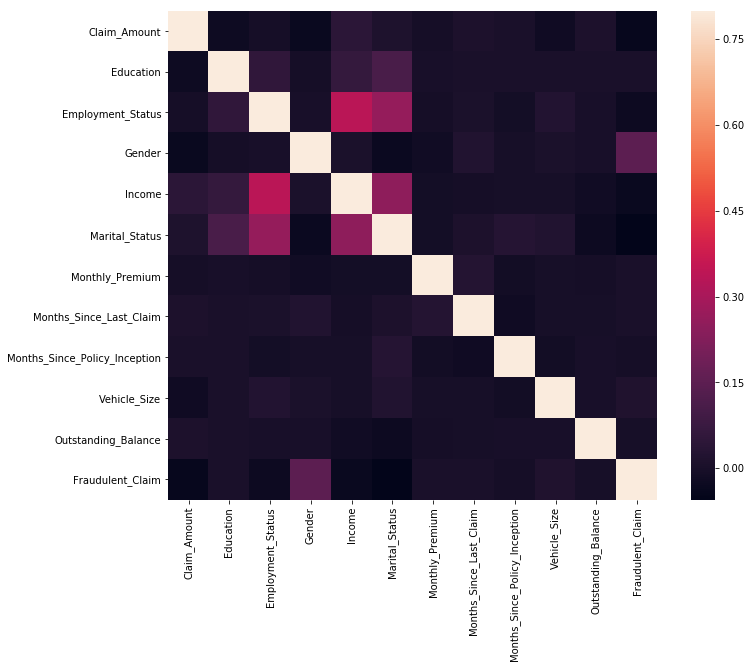

In [22]:
corrmat= data_train.drop('Claimant__Number', axis='columns').corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Sampling

## Encoding

In [23]:
# Above

In [ ]:
def one_hot_encode(columns, df=df):
    df = pd.get_dummies(df, columns=columns, prefix=columns)
    return df

In [ ]:
# Chose the columns to one hot encode
columns = [Vehicle_Class, Employee_Status]

In [ ]:
data_encoded = one_hot_encode(columns)

In [24]:
data_train.dtypes

State_Code                       category
Claim_Amount                      float64
Education                            int8
Claim_Date                       category
Employment_Status                   int64
Gender                              int64
Income                               int8
Location                         category
Marital_Status                      int64
Monthly_Premium                     int64
Months_Since_Last_Claim             int64
Months_Since_Policy_Inception       int64
Claim_Cause                      category
Claim_Report_Type                category
Vehicle_Class                    category
Vehicle_Size                        int64
Outstanding_Balance               float64
Fraudulent_Claim                    int64
Claimant__Number                    int64
dtype: object

## Modeling